In [146]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import math
from golomb_code import encode, decode
import os
from scipy.interpolate import make_interp_spline

In [147]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

## filtered data

In [148]:
file = '4b5c_filtered.edf'
data1 = mne.io.read_raw_edf(file)
data1.info

Extracting EDF parameters from /home/ifire/EEG/H-IoT-Golob-Rice-Compression-Automation/EEG data/4b5c_filtered.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


Measurement date,"April 27, 2022 07:50:40 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,4 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,125.00 Hz
Highpass,0.50 Hz
Lowpass,30.00 Hz


In [149]:
data1.ch_names

['ch1_LF5-FpZ', 'ch2_OTE_L-FpZ', 'ch4_RF6-FpZ', 'ch5_OTE_R-FpZ']

In [150]:
EEG_raw_data  = data1.get_data()
SCALE=1e5 ## sclaed by 100000
raw_data= EEG_raw_data*SCALE

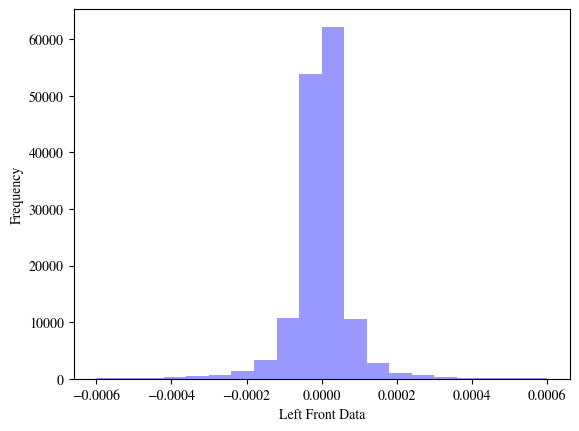

In [151]:
plt.hist(EEG_raw_data[0], bins = 20, range = [-0.0006, 0.0006], color='#9A99FF')
plt.xlabel('Left Front Data')
plt.ylabel('Frequency')
plt.savefig('filtered')

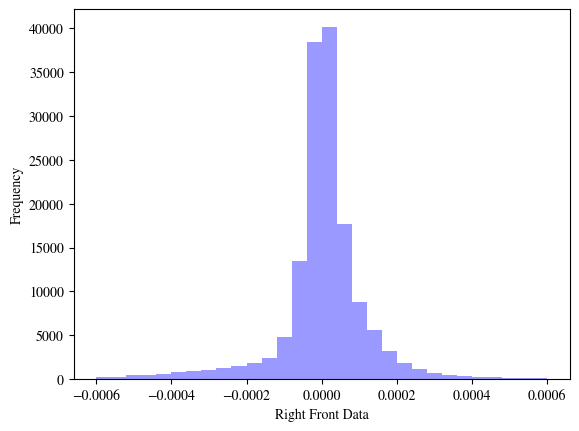

In [152]:
plt.hist(EEG_raw_data[1], bins = 30, range = [-0.0006, 0.0006], color='#9A99FF')
plt.xlabel('Right Front Data')
plt.ylabel('Frequency')
plt.savefig('eeg filtered output.pdf')

Text(0, 0.5, 'Frequency')

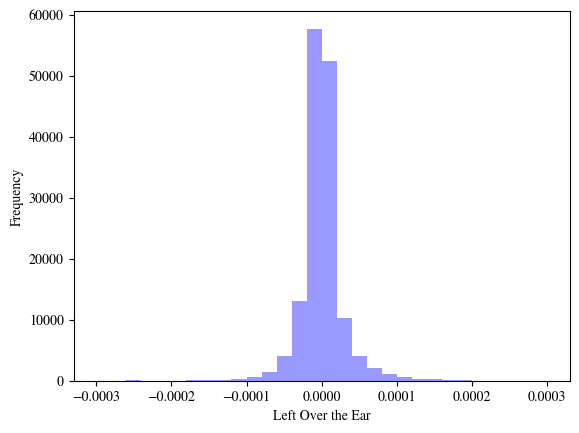

In [153]:
plt.hist(EEG_raw_data[2], bins = 30, range = [-0.0003, 0.0003], color='#9A99FF')
plt.xlabel('Left Over the Ear')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

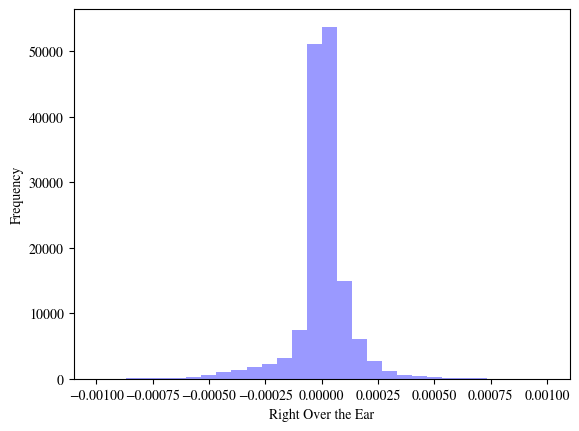

In [154]:
plt.hist(EEG_raw_data[3], bins = 30, range = [-0.001, 0.001], color='#9A99FF'
         )
plt.xlabel('Right Over the Ear')
plt.ylabel('Frequency')

## unfiltered data histogram

In [155]:
file = '4b5c_nofilter.edf'
data2 = mne.io.read_raw_edf(file)
data2.info

Extracting EDF parameters from /home/ifire/EEG/H-IoT-Golob-Rice-Compression-Automation/EEG data/4b5c_nofilter.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


Measurement date,"April 27, 2022 07:50:40 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,6 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,125.00 Hz
Highpass,0.00 Hz
Lowpass,62.50 Hz


In [156]:
data2.ch_names

['ch1_LF5-FpZ',
 'ch2_OTE_L-FpZ',
 'ch3_BE_L-FpZ',
 'ch4_RF6-FpZ',
 'ch5_OTE_R-FpZ',
 'ch6_BE_R-FpZ']

In [157]:
EEG_raw_data_2  = data2.get_data()
SCALE=1e5 ## sclaed by 100000
raw_data= EEG_raw_data_2*SCALE

Text(0, 0.5, 'Frequency')

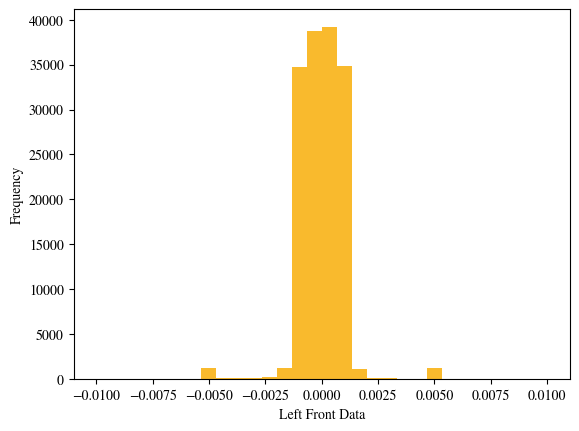

In [158]:
plt.hist(EEG_raw_data_2[0], bins = 30,range = [-0.01, 0.01], color='#F9BA2D')
plt.xlabel('Left Front Data')
plt.ylabel('Frequency')

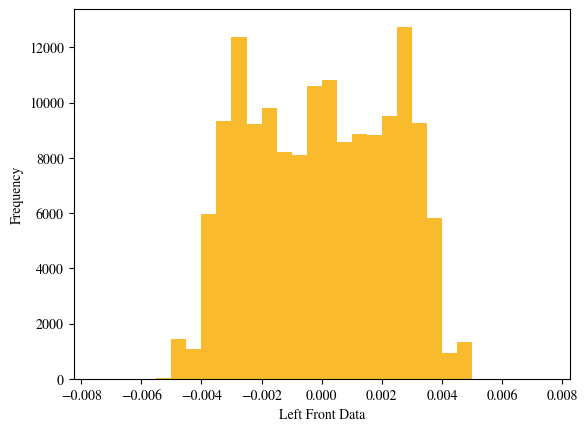

In [159]:
plt.hist(EEG_raw_data_2[1], bins = 30,range = [-0.0075, 0.0075], color='#F9BA2D')
plt.xlabel('Left Front Data')
plt.ylabel('Frequency')
plt.savefig('eeg unfiltered output.pdf')

Text(0, 0.5, 'Frequency')

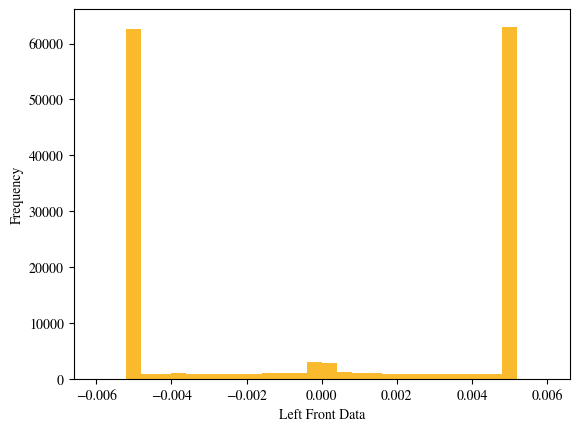

In [160]:
plt.hist(EEG_raw_data_2[2], bins = 30,range = [-0.006, 0.006], color='#F9BA2D')
plt.xlabel('Left Front Data')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

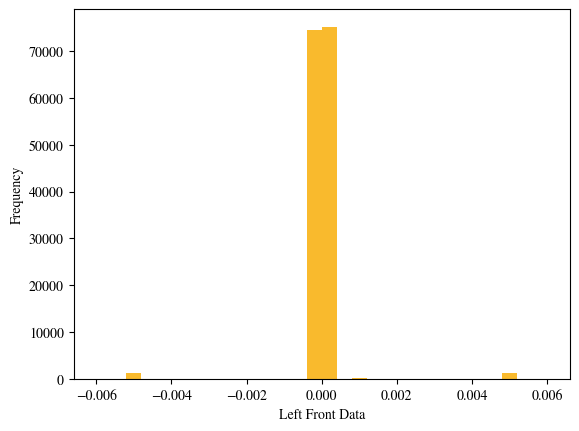

In [161]:
plt.hist(EEG_raw_data_2[3], bins = 30,range = [-0.006, 0.006], color='#F9BA2D')
plt.xlabel('Left Front Data')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

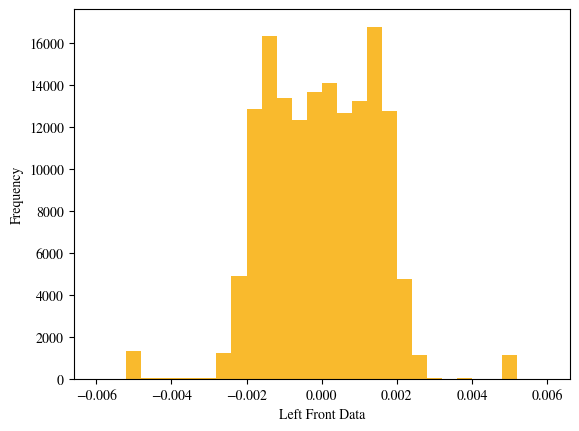

In [162]:
plt.hist(EEG_raw_data_2[4], bins = 30,range = [-0.006, 0.006], color='#F9BA2D')
plt.xlabel('Left Front Data')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

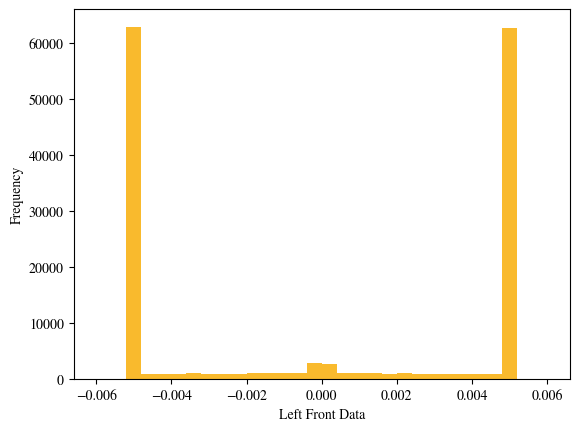

In [163]:
plt.hist(EEG_raw_data_2[5], bins = 30,range = [-0.006, 0.006], color='#F9BA2D')
plt.xlabel('Left Front Data')
plt.ylabel('Frequency')

## PPG histograms